In [6]:
from codes.deep_learning.download_model import download_and_save_hugging_face_models,train_model
from codes.deep_learning.predict_on_model import predict_on_tuned_model, predict_on_roberta,predict_on_vader
from codes.loading_and_filtering.parameters import categories
from codes.loading_and_filtering.data_loader import load_reviews
from codes.deep_learning.preprocessing import map_ratings_into_sentiment
#Run once on the beginning 
#download_and_save_hugging_face_models()

category = categories[32]
data = load_reviews(category).head(10000)
data = data[data["text"].str.split().str.len() >= 1]
data = map_ratings_into_sentiment(data, positive_threshold=4)
data

Model cardiffnlp/twitter-roberta-base-sentiment downloaded and saved.
Model bert-base-uncased downloaded and saved.


,rating,text,parent_asin,timestamp,star_based_sentiment
0,4,I’m playing on ps5 and it’s interesting. It’s...,B07DK1H3H5,2020-12-17 06:33:24.795,1
1,5,Nostalgic fun. A bit slow. I hope they don’t...,B07SRWRH5D,2020-04-16 15:31:54.941,1
2,5,This was an order for my kids & they have real...,B07MFMFW34,2017-03-30 12:37:11.000,1
3,5,"These work great, They use batteries which is ...",B0BCHWZX95,2019-12-29 16:40:34.017,1
4,5,I would recommend to anyone looking to add jus...,B00HUWA45W,2015-03-29 01:18:52.000,1
...,...,...,...,...,...
9995,3,"Works well, and is very fun to play! I have no...",B00VG3PUFA,2018-09-13 13:00:27.630,0
9996,5,Ordered to replace the cord on PlayStation 4. ...,B0BDWVBWC9,2022-02-25 20:27:23.135,1
9997,5,Not even a Star Wars fan…still really good game.,B07QQTJMRF,2021-08-22 02:13:50.441,1
9998,2,Booooo!,B07NVTR5FD,2021-08-22 02:13:03.833,0


Wykres rozkładu długości tekstów może być przydatny by wybrać maksymalną długość dla modelu deeplearningowego

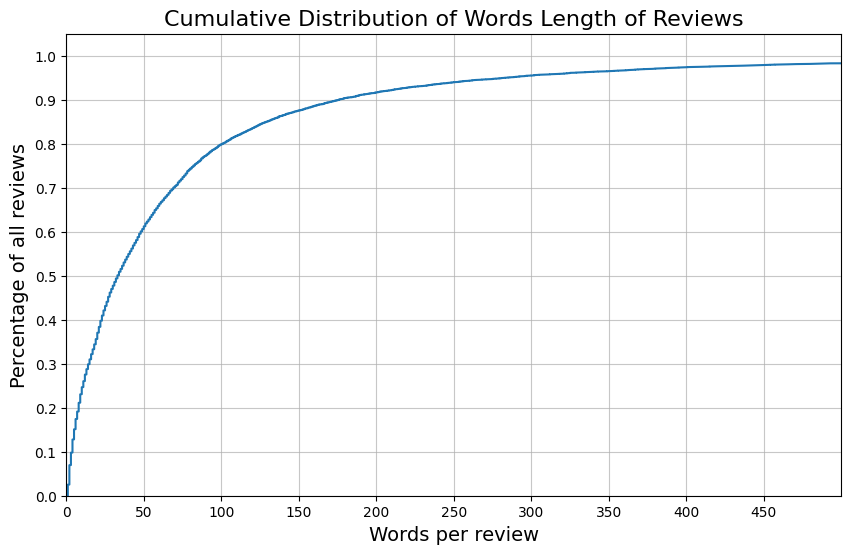

In [2]:
from codes.deep_learning.rating_analysis import plot_number_of_words_percentages

word_counts = data["text"].str.split().str.len()
plot_number_of_words_percentages(word_counts , 500)


Analiza recenzji i jak się zmieniały oceny w czasie

c:\Users\User\Desktop\INŻYNIERKA\Diploma-Project-Sentiment-analysis-based-on-products-reviews\codes\deep_learning\rating_analysis.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['timestamp'])


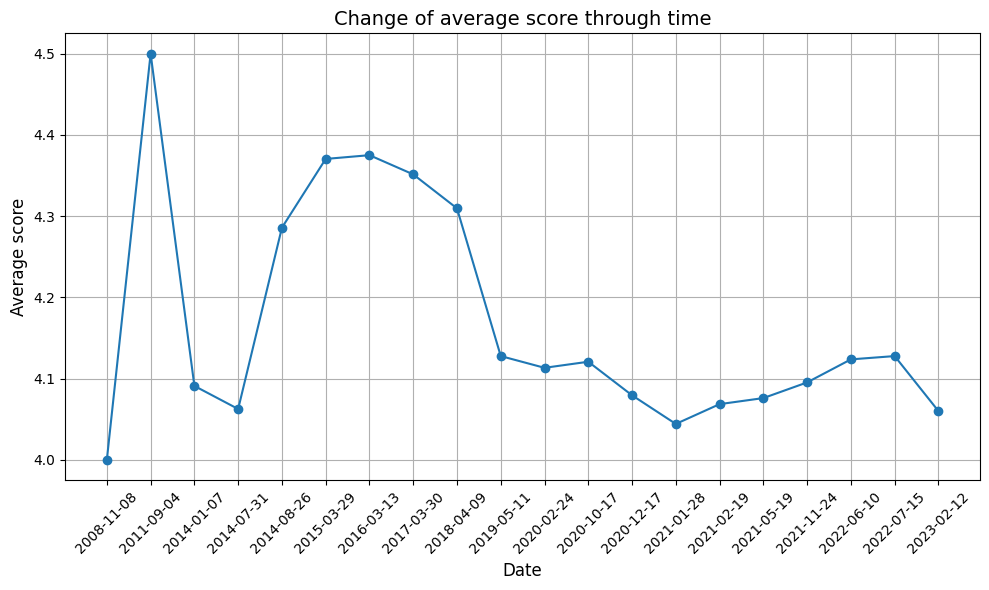

In [3]:
from codes.deep_learning.rating_analysis import plot_monthly_avg
plot_monthly_avg(data.head(100),20)

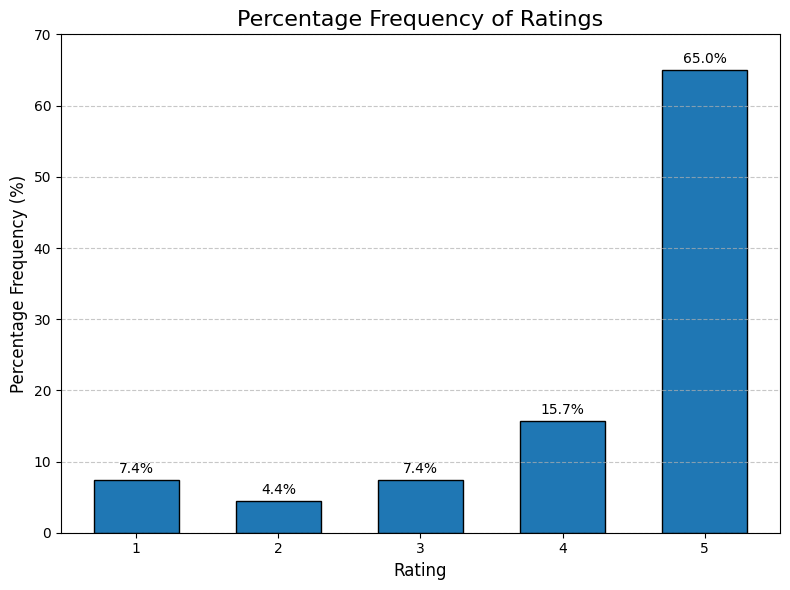

In [4]:
from codes.deep_learning.rating_analysis import distribiution_of_rating

distribiution_of_rating(data)

Modele do predykcji rating lub sentymentu

Typowa klasyfikacja z CrossEntropyLoss

In [7]:
data["target"] = [int(x)-1 for x in data["rating"]]
train_model(data,target="target",num_classes=5, localname="video_games_test")

Epoch 1/3, Train Loss: 0.8119, Val Loss: 0.7281, Val Accuracy: 0.7204
Epoch 2/3, Train Loss: 0.6070, Val Loss: 0.7082, Val Accuracy: 0.7264
Epoch 3/3, Train Loss: 0.4533, Val Loss: 0.7943, Val Accuracy: 0.7079
No improvement for 1 epochs. Patience: 3


c:\Users\User\Desktop\INŻYNIERKA\Diploma-Project-Sentiment-analysis-based-on-products-reviews\codes\deep_learning\download_model.py:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental fe

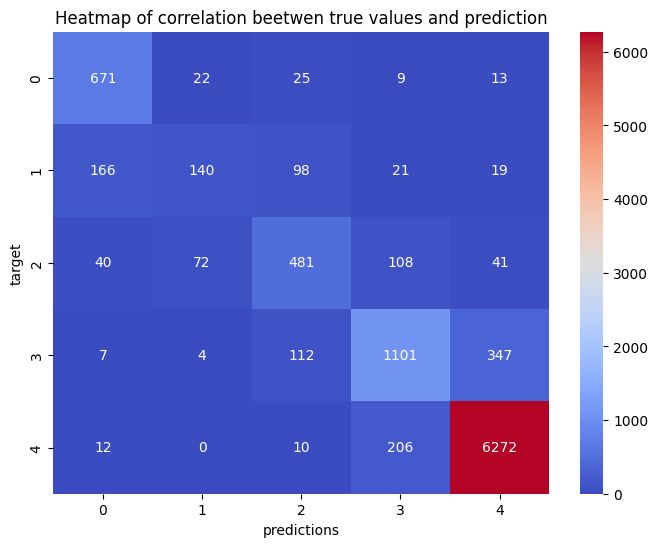

In [8]:
from codes.deep_learning.rating_analysis import heatmap
data["predictions"]=predict_on_tuned_model(data,r".\models\classification\video_games_test")
heatmap(data,"target","predictions")

Podejście regresyjne z MSELoss i mapowaniem ratingu na przedział [0,1] (Do poprawy, zapomniałem o sigmoidzie na koniec więc pomimo, że się uczy to może wyjść poza przedział)

In [9]:
data["target"]=(data["rating"]-1)/4
train_model(data,target="target",task="regression",num_classes=5, localname="video_games_test")

Epoch 1/3, Train Loss: 0.0486, Val Loss: 0.0361, Val Accuracy: 0.6478
Epoch 2/3, Train Loss: 0.0244, Val Loss: 0.0349, Val Accuracy: 0.7089
Epoch 3/3, Train Loss: 0.0146, Val Loss: 0.0336, Val Accuracy: 0.7104


c:\Users\User\Desktop\INŻYNIERKA\Diploma-Project-Sentiment-analysis-based-on-products-reviews\codes\deep_learning\download_model.py:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental fe

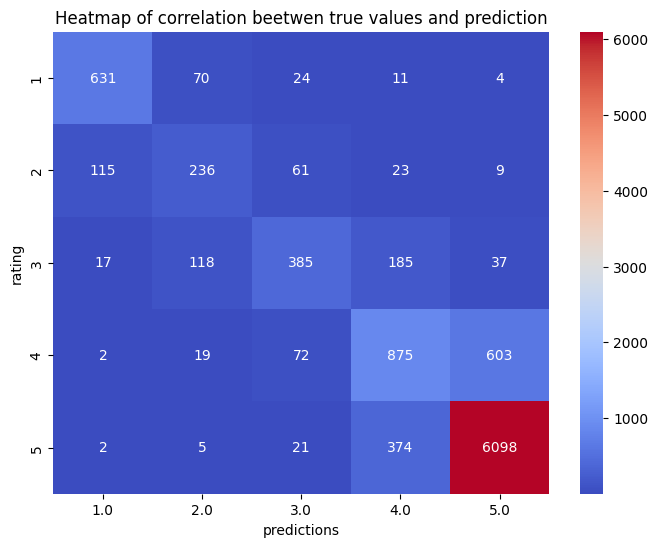

In [11]:
from codes.deep_learning.rating_analysis import heatmap
data["predictions"]=predict_on_tuned_model(data,r".\models\regression\video_games_test")
heatmap(data,"rating","predictions")

Wykorzystanie ratingu do predykcji sentymentu za pomocą mapowania gwiazdek na positive/negative

In [12]:
train_model(data,target="star_based_sentiment",num_classes=2, localname="video_games_test")

Epoch 1/3, Train Loss: 0.2749, Val Loss: 0.2539, Val Accuracy: 0.8969
Epoch 2/3, Train Loss: 0.1464, Val Loss: 0.2573, Val Accuracy: 0.9035
No improvement for 1 epochs. Patience: 3
Epoch 3/3, Train Loss: 0.0786, Val Loss: 0.2837, Val Accuracy: 0.9060
No improvement for 2 epochs. Patience: 3


c:\Users\User\Desktop\INŻYNIERKA\Diploma-Project-Sentiment-analysis-based-on-products-reviews\codes\deep_learning\download_model.py:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental fe

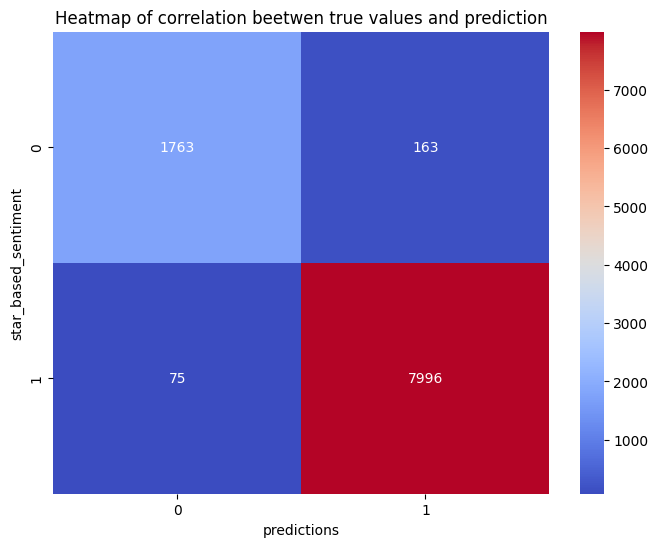

In [13]:
data["predictions"]=predict_on_tuned_model(data,r".\models\sentiment_prediction\video_games_test")
heatmap(data,"star_based_sentiment","predictions")

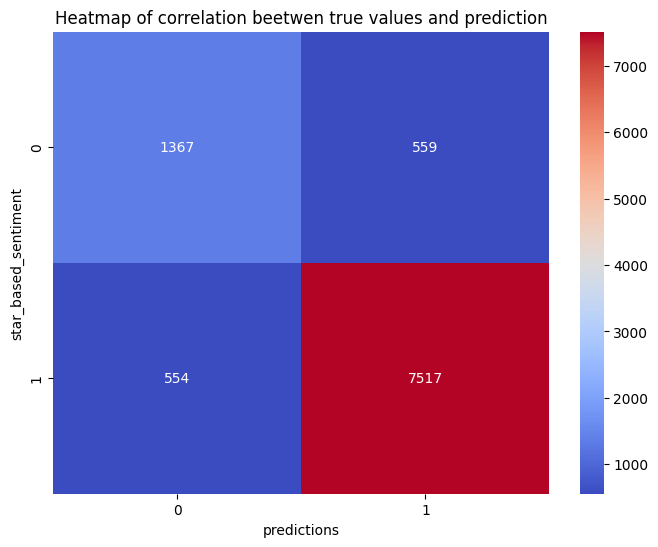

In [14]:
data["predictions"]=predict_on_roberta(data)
heatmap(data,"star_based_sentiment","predictions")

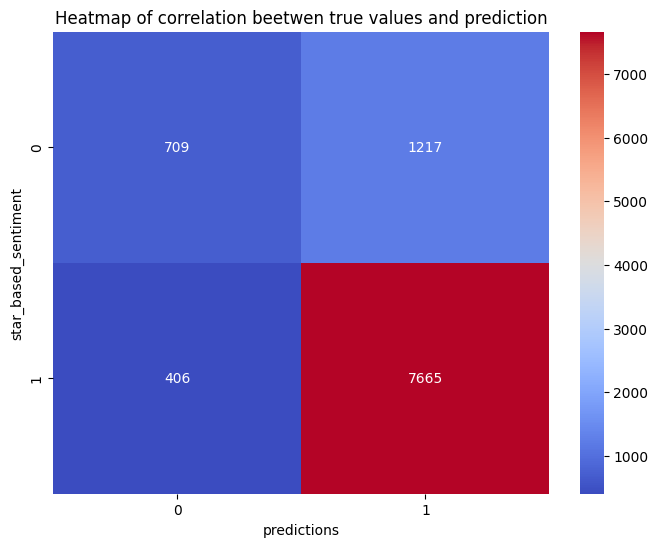

In [15]:
data["predictions"]=predict_on_vader(data)
heatmap(data,"star_based_sentiment","predictions")

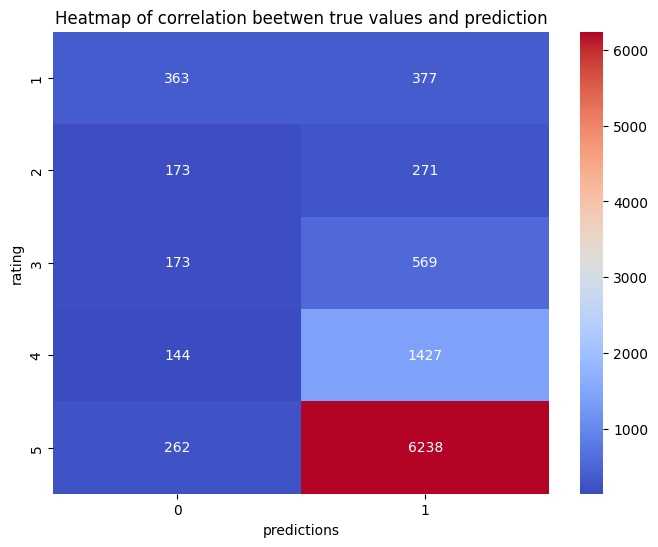

In [16]:
heatmap(data,"rating","predictions")